In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve

In [6]:
df=pd.read_csv('mushroom project.csv')

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


we have 8124 rows and 23 columns in dataset

In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


we have first 5 rows and 23 columns in our data set.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

this will give us small knowledge about our dataset including including non null values, memory usage and dtype values etc.

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


it shows the statics of columns including count,unique,top,freq.

In [11]:
print('Dataset shape:',df.shape)

Dataset shape: (8124, 23)


this shows we have 8124 rows and 23 columns in dataset

In [12]:
df['class'].unique()

array(['p', 'e'], dtype=object)

this shows the unique occurance in class of the data set

In [13]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

this gives us the unique value occurance in dataset

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


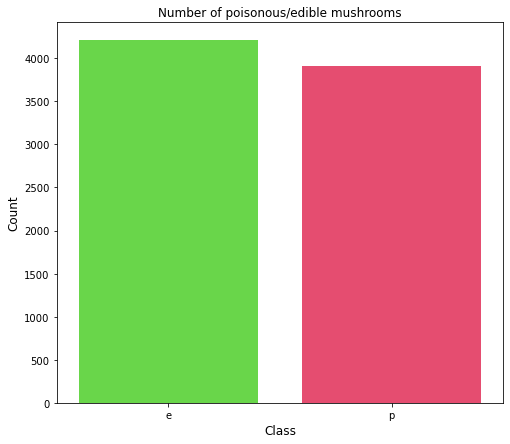

In [14]:
count=df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index,count.values,alpha=0.8,palette='prism')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Class',fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

this graph shows unique values i.e. p,e as count.values and this also shows dataset is balanced

In [15]:
df=df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

this shows the columns of dataset in the types of 'category'

In [16]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [17]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In this we can see there is no categorical value present in the dataset.

we can see column veil type is zero and no contribute to the dataset. so we have to remove it.

In [18]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

veil-type column is zero and no contribution to data

In [19]:
df=df.drop(['veil-type'],axis=1)

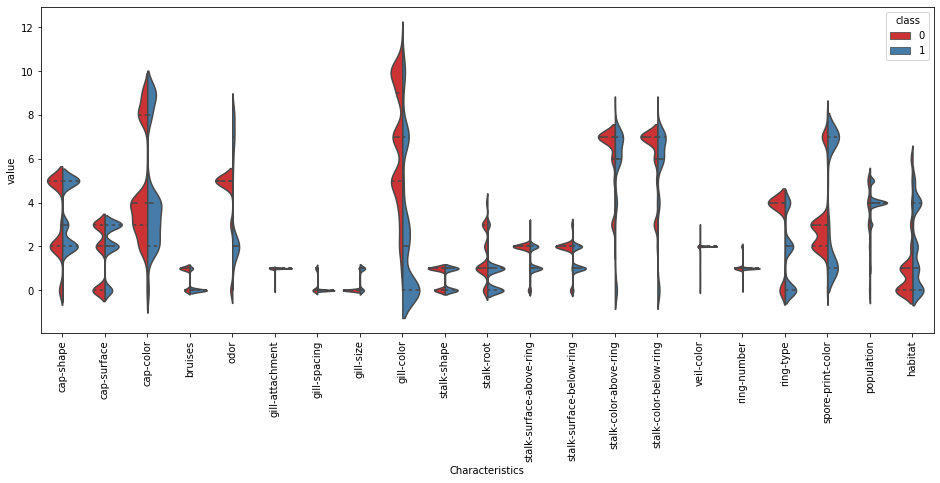

In [20]:
df_div=pd.melt(df,'class',var_name='Characteristics')
fig,ax=plt.subplots(figsize=(16,6))
p=sns.violinplot(ax=ax,x='Characteristics',y='value',hue='class',split=True,data=df_div,inner='quartile',palette='Set1')

df_no_class=df.drop(['class'],axis=1)
p.set_xticklabels(rotation=90,labels=list(df_no_class.columns));

this shows the distribution of the characteristics. we can see 'gill color' breaks into two parts one is above 3 and other is below three.

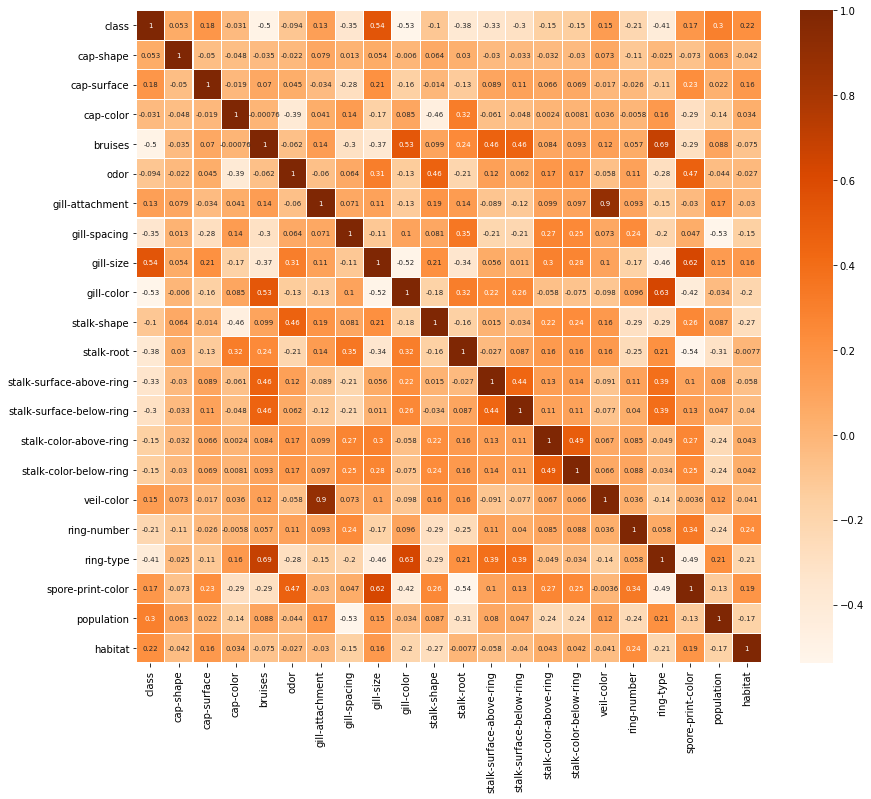

In [21]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap='Oranges',annot=True,annot_kws={'size':7})
plt.yticks(rotation=0);

It shows the correlation between the variables and the least correlating variable of 'gill color' is -0.53.

In [22]:
df[['class','gill-color']].groupby(['gill-color'],
as_index=False).mean().sort_values(by='class',ascending=False)                                  

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


this shows the 'gill cololr' used for classification.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


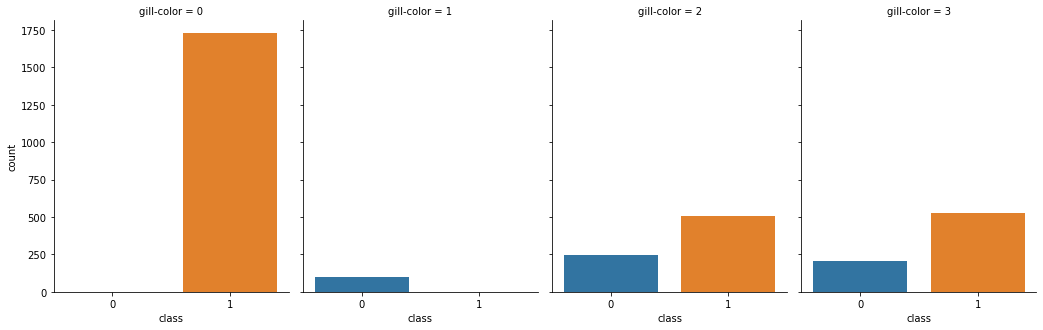

In [23]:
new_var=df[['class','gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]

sns.factorplot('class',col='gill-color',data=new_var,kind='count',size=4.5,aspect=.8,col_wrap=4);

this graph shows the 'gill-color' values lies <=3.5

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


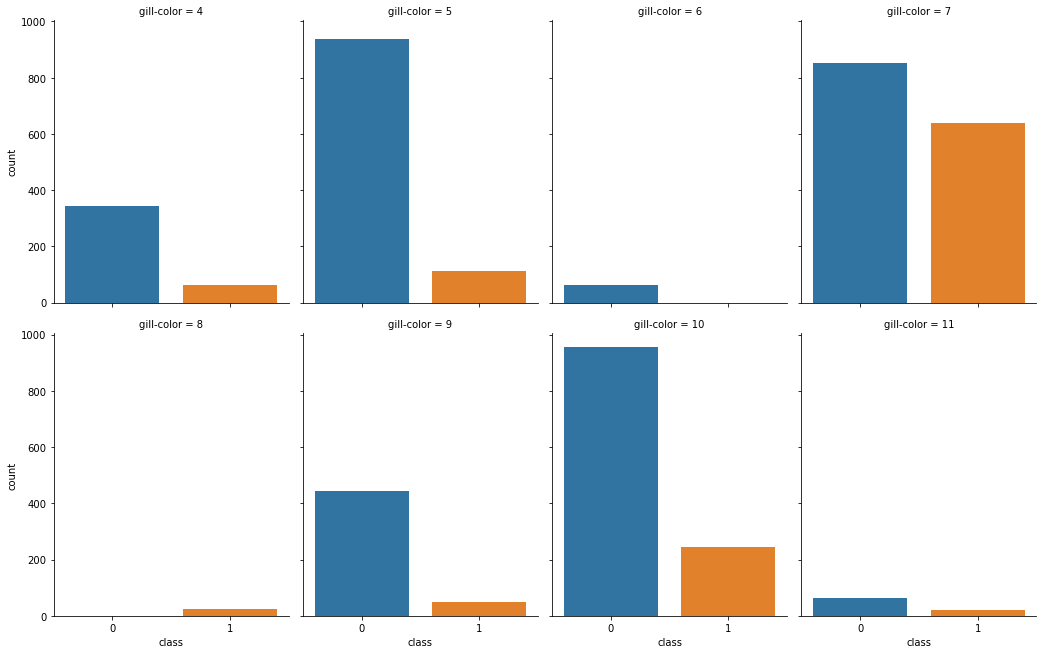

In [24]:
new_var=df[['class','gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class',col='gill-color',data=new_var,kind='count',size=4.5,aspect=.8,col_wrap=4);

this graph shows the gill color lies >3.5

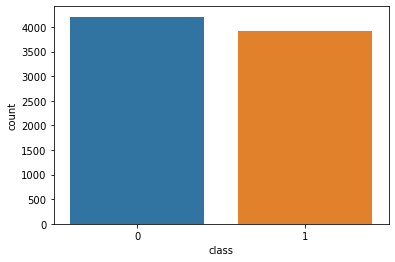

In [25]:
sns.countplot(x='class',data=df)
plt.show()

This shows the dataset is almost balanced

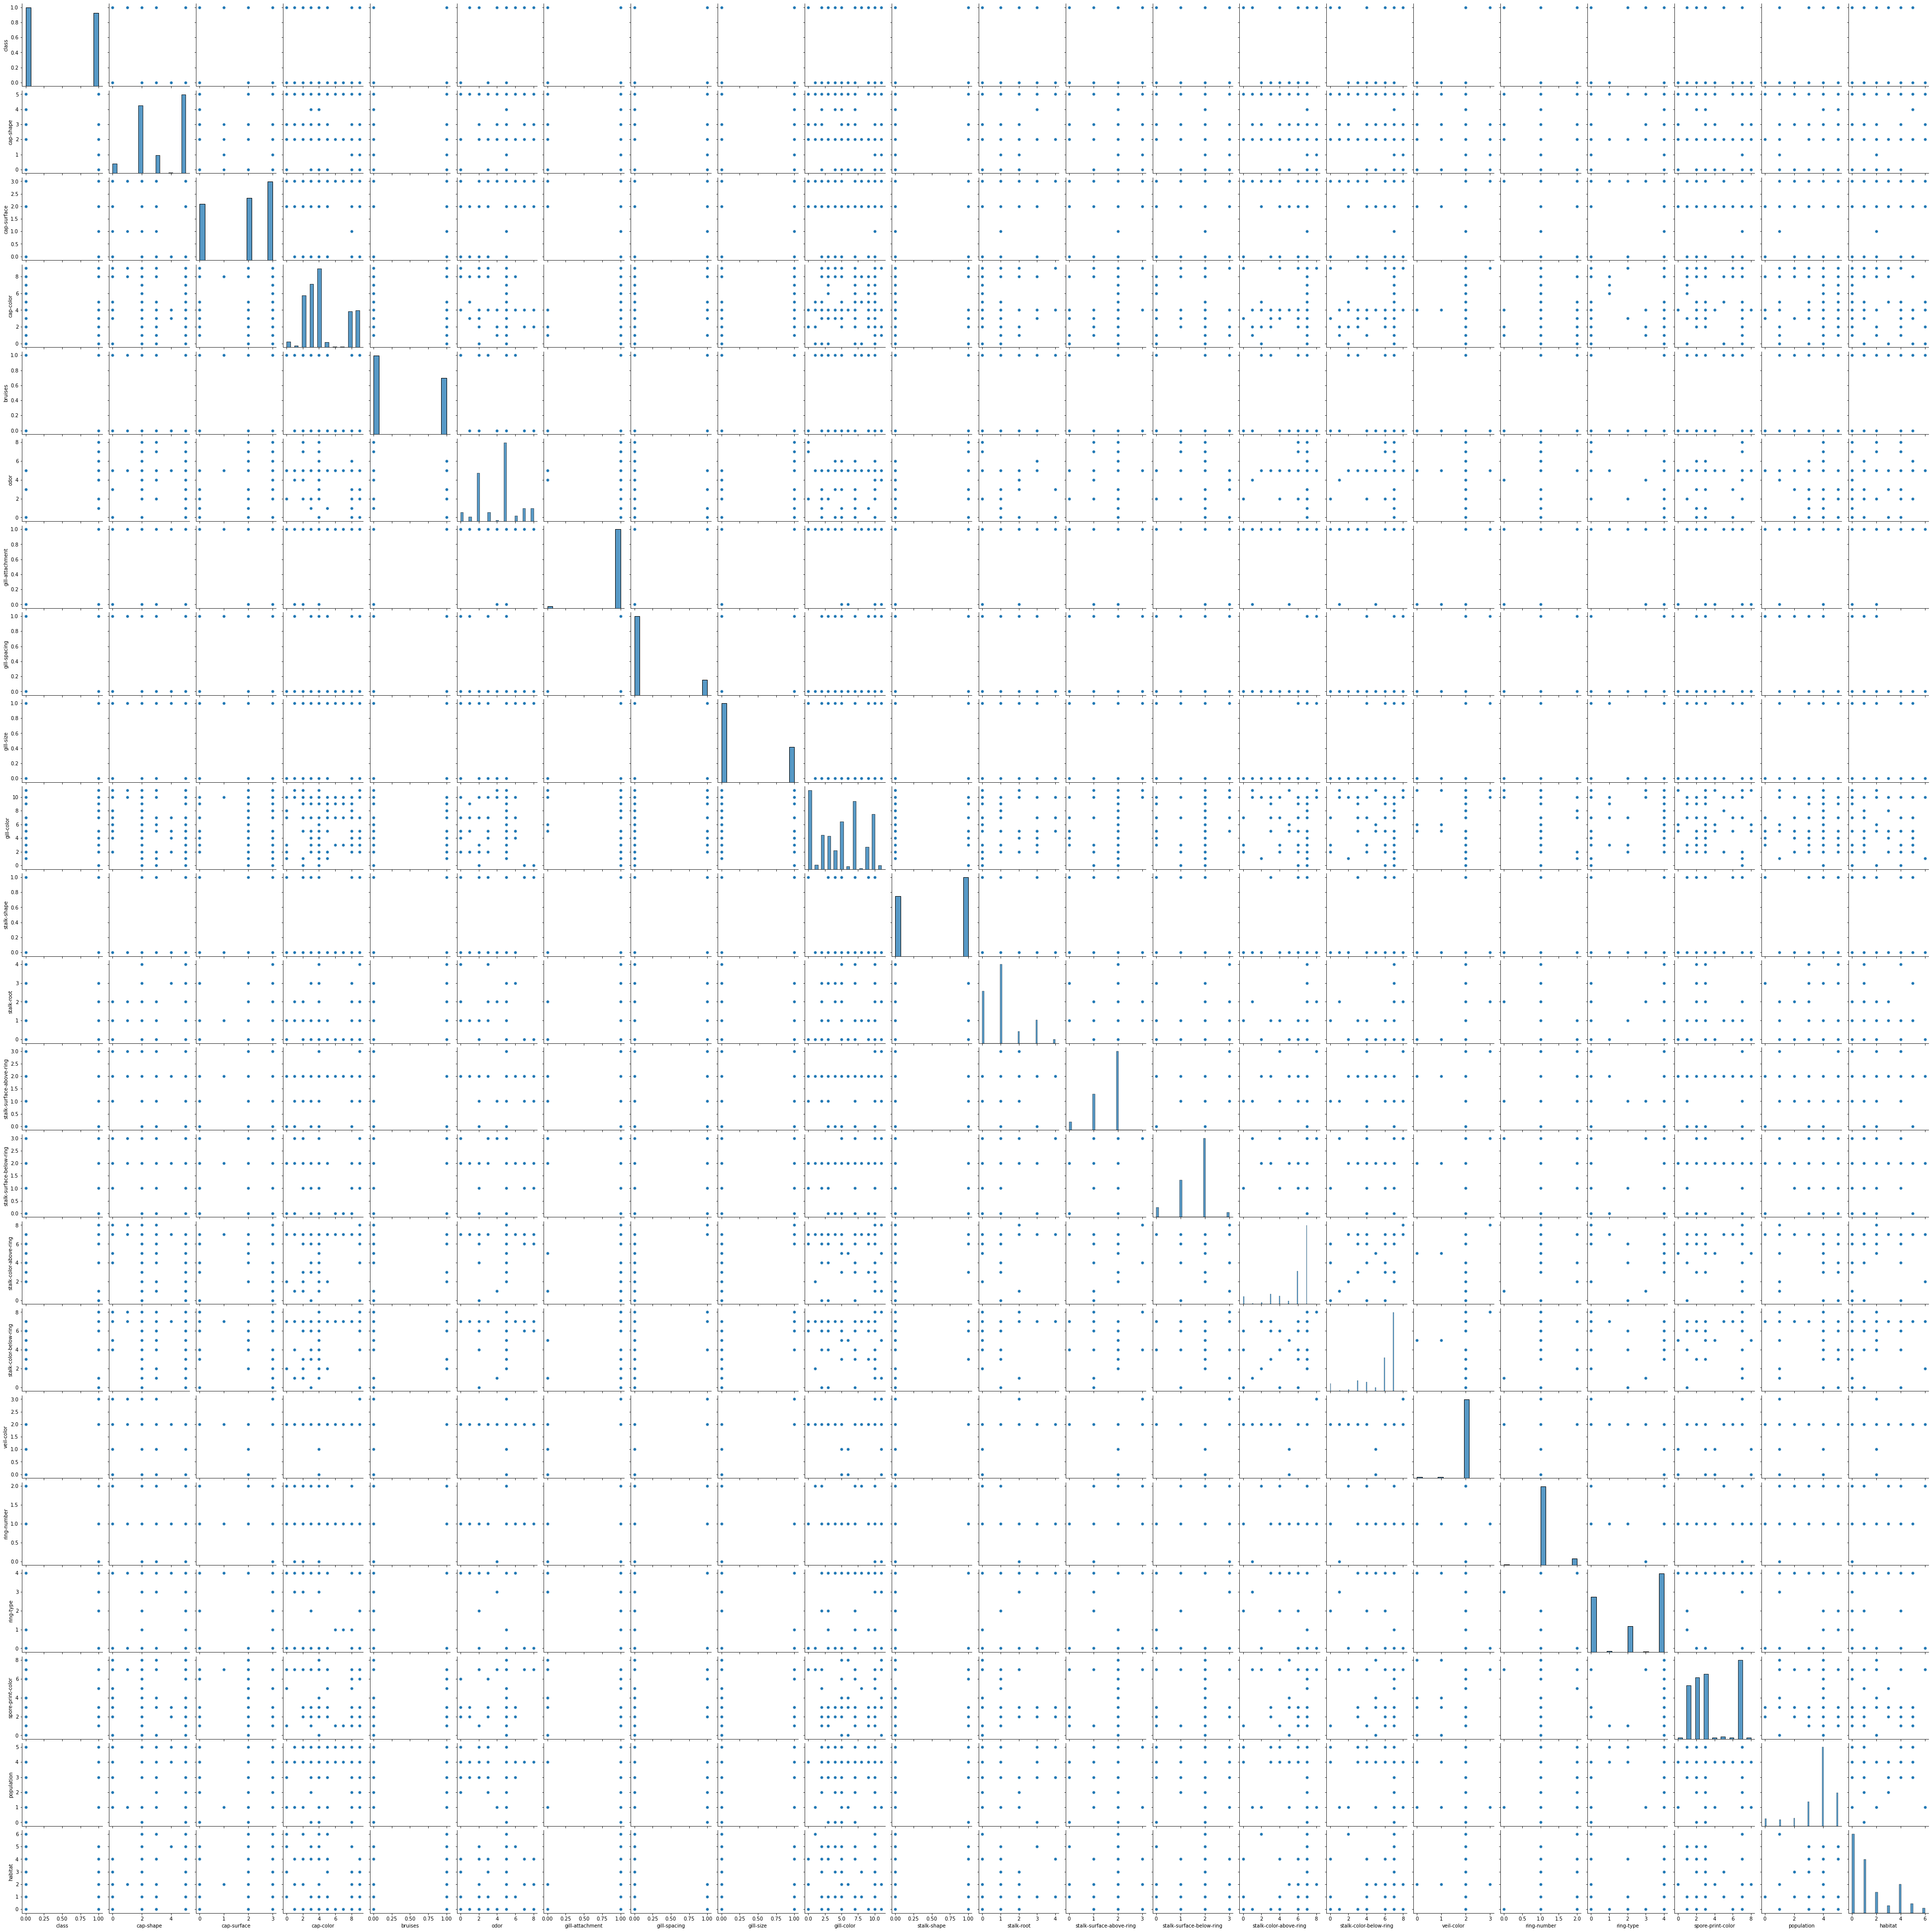

In [26]:
sns.pairplot(df)

This pairplot shows the different-2 corrletion occurs in the dataset.

In [27]:
from scipy.stats import zscore

In [28]:
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


This shows the z score value when zscr>3 and threshold value is equal to 3.

In [29]:
zscr[2128][3]

0.5910746076888268

this shows the z score value of 2128 row from the dataset when threshold value is 3.

In [30]:
dfnew=df[(zscr<3).all(axis=1)]

In [31]:
df=dfnew

In [32]:
df_x=df.drop(columns=['class'])
y=df[['class']]

In [33]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
       df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<0.5:
        df_x[i]=np.cbrt(df_x[i])
        
df_x.skew() 

cap-shape                  -2.380192
cap-surface                -0.947516
cap-color                  -5.838421
bruises                     0.124508
odor                       -2.006661
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                 -0.816588
stalk-shape                -0.881319
stalk-root                 -0.965164
stalk-surface-above-ring   -2.540563
stalk-surface-below-ring   -2.367410
stalk-color-above-ring     -1.958156
stalk-color-below-ring     -1.862855
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.394039
spore-print-color           0.120963
population                 -3.320979
habitat                    -0.222734
dtype: float64

This shows the skewness of  different-2 values of the column in the dataset.

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

x=pd.DataFrame(x,columns=df_x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.755704,0.445999,0.124216,1.064175,0.644681,0.0,-0.427782,1.273971,0.308877,-1.533304,...,0.470688,0.454045,0.571504,0.584254,1.0,0.0,0.868048,-0.606366,-0.101899,1.087277
1,0.755704,0.445999,0.833958,1.064175,-3.265323,0.0,-0.427782,-0.784947,0.308877,-1.533304,...,0.470688,0.454045,0.571504,0.584254,1.0,0.0,0.868048,0.008823,-0.577065,0.724100
2,-3.969997,0.445999,0.726860,1.064175,-0.161951,0.0,-0.427782,-0.784947,0.456534,-1.533304,...,0.470688,0.454045,0.571504,0.584254,1.0,0.0,0.868048,0.008823,-0.577065,0.964899
3,0.755704,0.742773,0.726860,1.064175,0.644681,0.0,-0.427782,1.273971,0.456534,-1.533304,...,0.470688,0.454045,0.571504,0.584254,1.0,0.0,0.868048,-0.606366,-0.101899,1.087277
4,0.755704,0.445999,-0.112591,-0.939695,0.414132,0.0,2.337641,-0.784947,0.308877,0.652186,...,0.470688,0.454045,0.571504,0.584254,1.0,0.0,-1.233758,0.008823,-3.860541,0.724100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,0.015814,0.742773,-0.433757,-0.939695,1.038193,0.0,-0.427782,1.273971,-1.603356,0.652186,...,-0.274656,-0.257475,-0.106514,-0.084384,1.0,0.0,-1.233758,1.387432,0.276380,-1.130609
6564,0.015814,0.742773,0.124216,-0.939695,0.850842,0.0,-0.427782,1.273971,-1.603356,0.652186,...,0.470688,-0.257475,-0.106514,0.584254,1.0,0.0,-1.233758,1.387432,0.276380,0.872588
6565,0.015814,0.445999,-0.433757,-0.939695,1.038193,0.0,-0.427782,1.273971,-1.603356,0.652186,...,-0.274656,0.454045,-0.106514,0.584254,1.0,0.0,-1.233758,1.387432,0.276380,-1.130609
6566,0.015814,0.742773,0.124216,-0.939695,-0.554278,0.0,-0.427782,1.273971,-1.603356,0.652186,...,-0.274656,0.454045,-0.106514,0.584254,1.0,0.0,-1.233758,1.387432,0.276380,-1.130609


in this we have 6568 rows and 21 columns

In [35]:
df.skew()

class                       0.124508
cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

This shows the skewness of different-2 values of the column in the dataset.



In [36]:
from sklearn.model_selection import train_test_split
y=df['class'].values
x=df.drop(['class'],axis=1).values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5123, 21)
(1445, 21)
(5123,)
(1445,)


This shows the shapes of x,y when apllying methods of train and test on these.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9660899653979239
[[727  28]
 [ 21 669]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       755
           1       0.96      0.97      0.96       690

    accuracy                           0.97      1445
   macro avg       0.97      0.97      0.97      1445
weighted avg       0.97      0.97      0.97      1445



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


in this we can see test accuracy is 94.79%

In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
1.0
[[755   0]
 [  0 690]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



in this test accuracy score is 100%

In [41]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.8885813148788927
[[717  38]
 [123 567]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       755
           1       0.94      0.82      0.88       690

    accuracy                           0.89      1445
   macro avg       0.90      0.89      0.89      1445
weighted avg       0.89      0.89      0.89      1445



in this we can see test accuracy score is 92.11%

In [42]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9993079584775086
[[755   0]
 [  1 689]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



we have test accuracy score 98.71%

In [43]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9993079584775086
[[755   0]
 [  1 689]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



in this test accuracy score is 98.71%

In [44]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9993079584775086
[[755   0]
 [  1 689]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



in this we can see test accuracy is 98.71%

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [46]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.77092846 0.97031963 0.9847793  1.         0.926885  ]
0.9305824786904401


In [47]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.67808219 0.67579909 0.90410959 1.         0.926885  ]
0.8369751727543671


In [48]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.80517504 1.         1.         1.         0.926885  ]
0.9464120068487354


In [49]:
score=cross_val_score(dt,x,y,cv=5)
print(score)
print(score.mean())

[0.90258752 1.         1.         1.         0.94516375]
0.969550253233964


# Hyper parameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter = {'max_depth': np.arange(2,10),
             'criterion':['gini','entropy']}

In [60]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [52]:
joblib.dump(rf,'mushroomrf.obj')

['mushroomrf.obj']

In [53]:
mushroomfile=joblib.load('mushroomrf.obj')
mushroomfile.predict(x_train)

array([0, 1, 1, ..., 0, 1, 1])

In [54]:
model=[lg,sv,gnb,dt,rf,ad]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy score: LogisticRegression()
0.9660899653979239
[[727  28]
 [ 21 669]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       755
           1       0.96      0.97      0.96       690

    accuracy                           0.97      1445
   macro avg       0.97      0.97      0.97      1445
weighted avg       0.97      0.97      0.97      1445

[0.78082192 0.91933029 0.95509893 1.         0.92916984]
0.9168841963226881
accuracy score: SVC()
0.9993079584775086
[[755   0]
 [  1 689]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       755
           1       1.00      1.00      1.00       690

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445

[0.77092846 0.97031963 0.9847793  1.         0.926885  ]
0.9305824786904401
accuracy score: GaussianNB()
0.8885813148788927
[[7

in this we have different-2 test accuracy score which is given below:-
    1. Logistic regression = 95%
    2. SVC=99%
    3. Naive byes Gaussian=92%
    4. Decision tree classifier=100%
    5. Random forest classifier=100%
    6. Adaboost classifier=100%

In [55]:
joblib.dump(sv,'svmodel.obj')

['svmodel.obj']

In [56]:
svfile=joblib.load('svmodel.obj')
svfile.predict(x_train)

array([0, 1, 1, ..., 0, 1, 1])

# Conclusion

with confusion matrix we observed that our train and test data's are balanced,so there is no problem.

most of the classification mathods reaches at 100% accuracy with the dataset